In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing





import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

# Data Exploration

In [38]:
data=pd.read_csv('public_dat/store_train.csv', sep =' ', header=None)
featureNames = ["shopID","dayOfWeek","date","visitNumber","open","promo","stateHoliday","schoolHoliday"]
data.columns = featureNames

target = pd.read_csv('public_dat/store_train_solution.csv', sep=' ', header=None)

data["year"] = data["date"].map(lambda x : int(x[:4]))
data["month"] = data["date"].map(lambda x : int(x[5:7]))
data["day"] = data["date"].map(lambda x : int(x[8:]))

del data["stateHoliday"]
del data["shopID"]
del data["date"]

data["target"]=target

data["relativeDay"]=data["day"]+(data["month"]-1)*30+(data["year"]-2013)*365





dayOfWeek        2.671179
visitNumber      2.671179
open             2.671179
promo            2.671179
schoolHoliday    2.671179
year             2.671179
month            2.671179
day              2.671179
target           2.671179
relativeDay      2.671179
dtype: float64


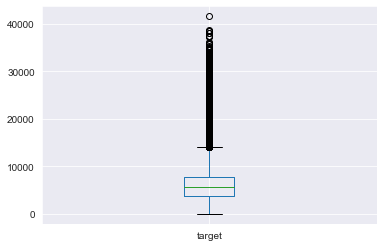

In [39]:
data.boxplot(column="target")



print(data[data["target"]>14000].count()/data.count()*100)
data.drop(data.index[data['target'] >14000], inplace = True)


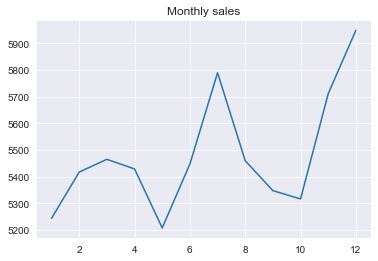

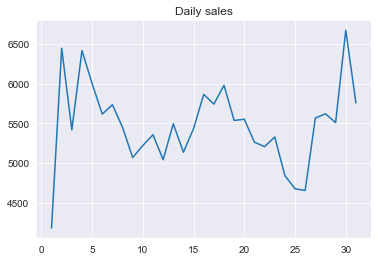

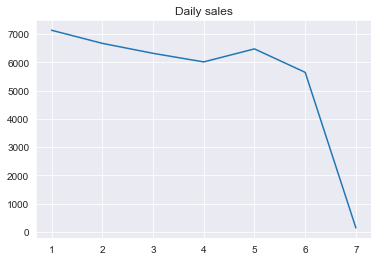

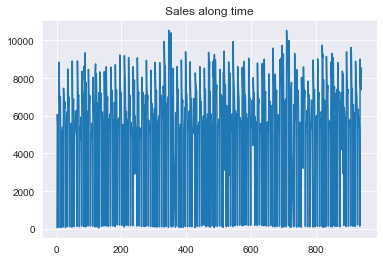

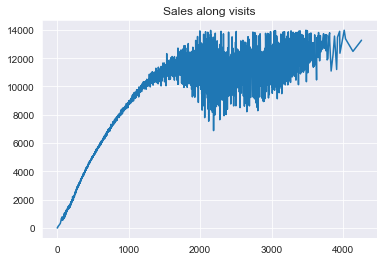

In [40]:
sales_by_month = data.groupby('month').mean()
plt.plot(sales_by_month["target"])
plt.title("Monthly sales")
plt.show()

sales_by_day = data.groupby('day').mean()
plt.plot(sales_by_day["target"])
plt.title("Daily sales")
plt.show()

sales_by_day_of_week = data.groupby('dayOfWeek').mean()
plt.plot(sales_by_day_of_week["target"])
plt.title("Daily sales")
plt.show()




sales_along_time = data.groupby('relativeDay').mean()
plt.plot(sales_along_time["target"])
plt.title("Sales along time")
plt.show()



sales_along_visits = data.groupby('visitNumber').mean()
plt.plot(sales_along_visits["target"])
plt.title("Sales along visits")
plt.show()



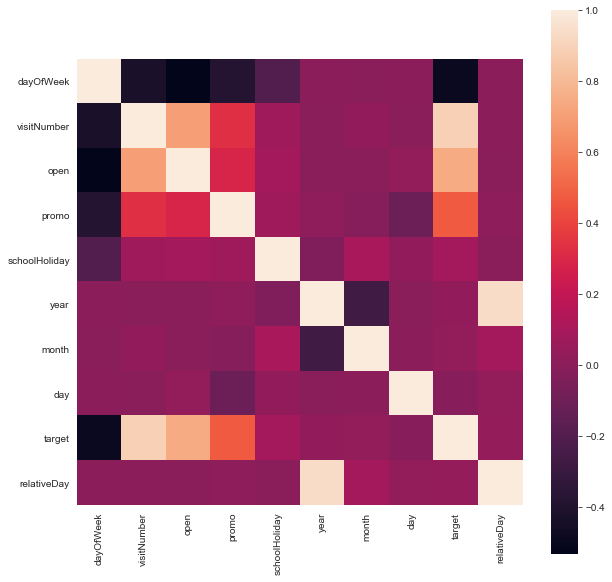

In [41]:
cormat=data.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cormat,square=True)

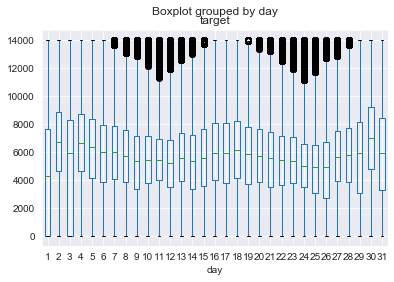

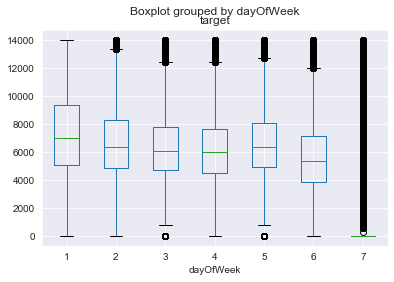

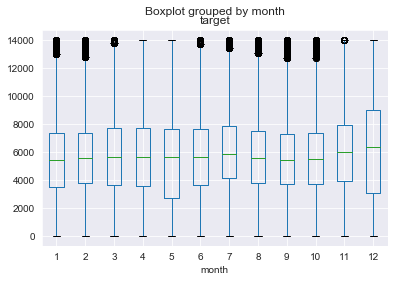

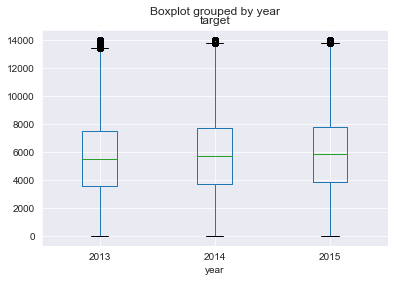

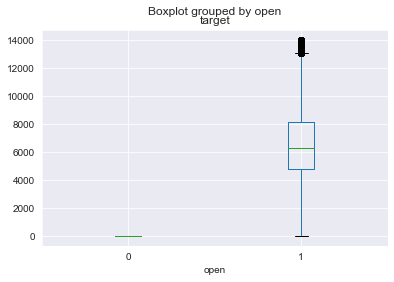

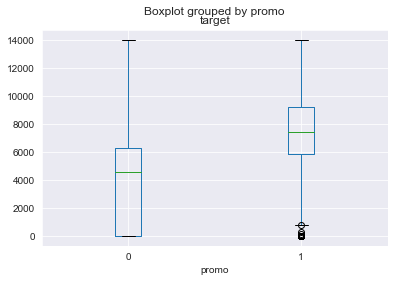

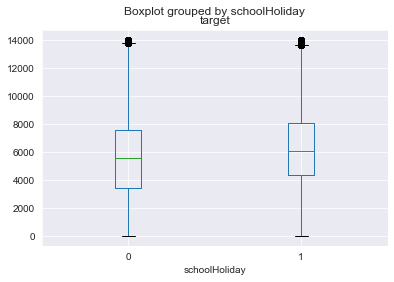

In [6]:
data.boxplot(column="target", by="day")
data.boxplot(column="target", by="dayOfWeek")
data.boxplot(column="target", by="month")
data.boxplot(column="target", by="year")
data.boxplot(column="target", by="open")
data.boxplot(column="target", by="promo")
data.boxplot(column="target", by="schoolHoliday")



In [42]:
target= data["target"]


del data["target"]

data.head()

,dayOfWeek,visitNumber,open,promo,schoolHoliday,year,month,day,relativeDay
0,3,641,1,1,0,2013,11,6,306
1,2,877,1,1,1,2013,7,16,196
2,4,561,1,1,0,2014,1,23,388
3,4,1584,1,1,0,2013,9,26,266
4,3,1477,1,1,0,2014,1,22,387


# Lasso Regression

In [95]:
regression_data=pd.DataFrame()
regression_data=data




regression_data["dayOfWeek"]=pd.Categorical(regression_data["dayOfWeek"],ordered=False)
regression_data["year"]=pd.Categorical(regression_data["year"],ordered=False)
regression_data["month"]=pd.Categorical(regression_data["month"],ordered=False)
regression_data["day"]=pd.Categorical(regression_data["day"],ordered=False)




trainDataDummies=pd.get_dummies(regression_data[["dayOfWeek","year","month","day"]])


regression_data=pd.concat([regression_data,trainDataDummies],axis=1)

X_train, X_test, y_train, y_test = train_test_split(regression_data, target, test_size=0.33, random_state=42)



regLasso = linear_model.Lasso()


regLasso = linear_model.Lasso()
regLasso.fit(X_train,y_train)


prev=regLasso.predict(X_test)
print("MSE=",mean_squared_error(y_test,prev))



MSE= 1623516.248930531


In [100]:

grid_params={'alpha':[0,0.1,0.5,1],'normalize':[True, False]}
regLasso = linear_model.Lasso()

gLasso = GridSearchCV(
        estimator= regLasso,
        param_grid=grid_params,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)


grid_result = gLasso.fit(X_train,y_train)





/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:741: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376269776614.9772, tolerance: 525202553.43795335
  positive)


In [102]:
results=grid_result.best_params_
results


{'alpha': 0, 'normalize': True}

Best params: alpha=0, normalize= True

In [103]:
grid_result.best_score_

-1621143.908574372

In [106]:
estimator=grid_result.best_estimator_
prev=estimator.predict(X_test)
print("MSE=",mean_squared_error(y_test,prev))

MSE= 1621989.4693641034


In [122]:
submission_data=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
submission_data.columns = featureNames


submission_data["year"] = submission_data["date"].map(lambda x : int(x[:4]))
submission_data["month"] = submission_data["date"].map(lambda x : int(x[5:7]))
submission_data["day"] = submission_data["date"].map(lambda x : int(x[8:]))

del submission_data["stateHoliday"]
del submission_data["shopID"]
del submission_data["date"]


submission_data["relativeDay"]=submission_data["day"]+(submission_data["month"]-1)*30+(submission_data["year"]-2013)*365
submission_data.head()



submission_data["dayOfWeek"]=pd.Categorical(submission_data["dayOfWeek"],ordered=False)
submission_data["year"]=pd.Categorical(submission_data["year"],ordered=False)
submission_data["month"]=pd.Categorical(submission_data["month"],ordered=False)
submission_data["day"]=pd.Categorical(submission_data["day"],ordered=False)




trainDataDummies=pd.get_dummies(submission_data[["dayOfWeek","year","month","day"]])


submission_data=pd.concat([submission_data,trainDataDummies],axis=1)

submission_data.head()


sub = pd.DataFrame()
sub["result"]=estimator.predict(submission_data)
sub.head()

sub = sub.where(sub["result"] > 0, 0)



sub.to_csv("Lasso_regression.csv",index=False,header=False)

# Ridge Regression

# Elastic Net

# Stochastic Gradient Descent

# XGBoost

# AdaBoost

# Neural Nets

In [83]:
nn_data=pd.DataFrame()
nn_data=data

standard_data=pd.DataFrame()
standard_data["dayOfWeek"]=preprocessing.scale(nn_data["dayOfWeek"])
standard_data["visitNumber"]=preprocessing.scale(nn_data["visitNumber"])
standard_data["open"]=preprocessing.scale(nn_data["open"])
standard_data["promo"]=preprocessing.scale(nn_data["promo"])
standard_data["schoolHoliday"]=preprocessing.scale(nn_data["schoolHoliday"])
standard_data["year"]=preprocessing.scale(nn_data["year"])
standard_data["month"]=preprocessing.scale(nn_data["month"])
standard_data["day"]=preprocessing.scale(nn_data["day"])
standard_data["relativeDay"]=preprocessing.scale(nn_data["relativeDay"])





X_train, X_test, y_train, y_test = train_test_split(standard_data, target, test_size=0.33, random_state=42)

In [87]:
from sklearn.neural_network import MLPRegressor

mlp=MLPRegressor(alpha=1e-4,learning_rate_init=0.001,verbose=10,tol=0.00001,solver='adam',activation="relu")


mlp.fit(X_train, y_train)
print('current loss computed with the loss function: ',mlp.loss_)



print(' number of iterations for the solver: ', mlp.n_iter_)
print('num of layers: ', mlp.n_layers_)



mlp_predict=mlp.predict(X_test)

mlp_predict

print("MSE=",mean_squared_error(y_test,mlp_predict))





Iteration 1, loss = 16422423.46844549
Iteration 2, loss = 5486782.29866611
Iteration 3, loss = 1653966.12834569
Iteration 4, loss = 1008704.54430993
Iteration 5, loss = 874370.91700405
Iteration 6, loss = 812267.92292079
Iteration 7, loss = 767532.84935664
Iteration 8, loss = 749104.52498807
Iteration 9, loss = 739591.58249790
Iteration 10, loss = 732870.43129467
Iteration 11, loss = 727403.43129552
Iteration 12, loss = 722519.01595361
Iteration 13, loss = 718204.74068642
Iteration 14, loss = 714244.06558786
Iteration 15, loss = 710587.65172066
Iteration 16, loss = 707106.69791895
Iteration 17, loss = 703796.05009989
Iteration 18, loss = 700715.10743032
Iteration 19, loss = 697806.61268553
Iteration 20, loss = 695186.93123331
Iteration 21, loss = 692781.85313383
Iteration 22, loss = 690657.85154228
Iteration 23, loss = 688775.93593175
Iteration 24, loss = 687108.57133679
Iteration 25, loss = 685648.75256182
Iteration 26, loss = 684250.76569876
Iteration 27, loss = 683056.74476276
Itera

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE= 1294705.5847303397


In [88]:
mlp_predict

array([ 8.59971259e+03,  6.73976868e+03,  5.73242079e+03, ...,
       -6.62727703e+00,  6.85309383e+03,  4.39671929e+03])

In [89]:
estimator=mlp

In [90]:
X_train.head()

,dayOfWeek,visitNumber,open,promo,schoolHoliday,year,month,day,relativeDay
615644,-0.518114,-0.105265,0.459748,-0.770143,-0.463968,0.215495,-0.852329,1.172069,-0.048458
322977,-1.522379,0.465812,0.459748,-0.770143,-0.463968,-1.070509,0.052793,0.944101,-1.057321
579077,-1.020247,-0.082422,0.459748,-0.770143,-0.463968,-1.070509,-1.455744,1.514021,-1.585426
25635,0.486152,0.123166,0.459748,1.298460,-0.463968,0.215495,-1.154037,0.602148,-0.175932
653882,0.988285,-0.635732,0.459748,-0.770143,-0.463968,1.501500,-0.248915,0.830116,1.488510


In [79]:
standard_data.head()

,dayOfWeek,visitNumber,open,promo,schoolHoliday,year,month,day,relativeDay
0,0.502904,0.198080,0.45281,1.274788,-0.4655,0.213222,1.853006,0.377852,0.906263
1,0.002854,-0.147334,0.45281,-0.784444,-0.4655,-1.072224,-1.152794,1.403196,-1.483207
2,-0.497197,0.024300,0.45281,1.274788,-0.4655,-1.072224,0.049526,-1.217127,-1.129886
3,1.002954,-0.424095,0.45281,-0.784444,-0.4655,1.498668,-0.852214,1.403196,1.285082
4,0.002854,0.356842,0.45281,1.274788,-0.4655,0.213222,1.251846,-1.558908,0.625792


In [93]:
submission_data=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
submission_data.columns = featureNames


submission_data["year"] = submission_data["date"].map(lambda x : int(x[:4]))
submission_data["month"] = submission_data["date"].map(lambda x : int(x[5:7]))
submission_data["day"] = submission_data["date"].map(lambda x : int(x[8:]))

del submission_data["stateHoliday"]
del submission_data["shopID"]
del submission_data["date"]


submission_data["relativeDay"]=submission_data["day"]+(submission_data["month"]-1)*30+(submission_data["year"]-2013)*365
submission_data.head()


standard_data=pd.DataFrame()
standard_data["dayOfWeek"]=preprocessing.scale(submission_data["dayOfWeek"])
standard_data["visitNumber"]=preprocessing.scale(submission_data["visitNumber"])
standard_data["open"]=preprocessing.scale(submission_data["open"])
standard_data["promo"]=preprocessing.scale(submission_data["promo"])
standard_data["schoolHoliday"]=preprocessing.scale(submission_data["schoolHoliday"])
standard_data["year"]=preprocessing.scale(submission_data["year"])
standard_data["month"]=preprocessing.scale(submission_data["month"])
standard_data["day"]=preprocessing.scale(submission_data["day"])
standard_data["relativeDay"]=preprocessing.scale(submission_data["relativeDay"])


sub = pd.DataFrame()
sub["result"]=estimator.predict(submission_data)
standard_data.head()


sub = pd.DataFrame()
sub["result"]=estimator.predict(standard_data)
sub.head()

sub = sub.where(sub["result"] > 0, 0)



sub.to_csv("NN_regression.csv",index=False,header=False)





# KNN

In [51]:
data.head()

,dayOfWeek,visitNumber,open,promo,schoolHoliday,year,month,day,relativeDay
0,3,641,1,1,0,2013,11,6,306
1,2,877,1,1,1,2013,7,16,196
2,4,561,1,1,0,2014,1,23,388
3,4,1584,1,1,0,2013,9,26,266
4,3,1477,1,1,0,2014,1,22,387


In [58]:

knn_data=pd.DataFrame()
knn_data=data

standard_data=pd.DataFrame()
standard_data["dayOfWeek"]=preprocessing.scale(knn_data["dayOfWeek"])
standard_data["visitNumber"]=preprocessing.scale(knn_data["visitNumber"])
standard_data["open"]=preprocessing.scale(knn_data["open"])
standard_data["promo"]=preprocessing.scale(knn_data["promo"])
standard_data["month"]=preprocessing.scale(knn_data["month"])
standard_data["year"]=preprocessing.scale(knn_data["year"])
standard_data["day"]=preprocessing.scale(knn_data["day"])
standard_data["relativeDay"]=preprocessing.scale(knn_data["relativeDay"])









#knn_data["dayOfWeek"]=pd.Categorical(knn_data["dayOfWeek"],ordered=False)
#knn_data["year"]=pd.Categorical(knn_data["year"],ordered=False)
#knn_data["month"]=pd.Categorical(knn_data["month"],ordered=False)
#knn_data["day"]=pd.Categorical(knn_data["day"],ordered=False)




#trainDataDummies=pd.get_dummies(knn_data[["dayOfWeek","year","month","day"]])


#knn_data=pd.concat([knn_data,trainDataDummies],axis=1)

X_train, X_test, y_train, y_test = train_test_split(standard_data, target, test_size=0.33, random_state=42)
standard_data.head()

,dayOfWeek,visitNumber,open,promo,month,year,day,relativeDay
0,-0.518114,0.113013,0.459748,1.29846,1.561329,-1.070509,-1.107612,-0.576563
1,-1.020247,0.712009,0.459748,1.29846,0.354500,-1.070509,0.032228,-0.977195
2,-0.015981,-0.090036,0.459748,1.29846,-1.455744,0.215495,0.830116,-0.277911
3,-0.015981,2.506460,0.459748,1.29846,0.957915,-1.070509,1.172069,-0.722247
4,-0.518114,2.234881,0.459748,1.29846,-1.455744,0.215495,0.716132,-0.281553


In [59]:
from sklearn.neighbors import KNeighborsRegressor



knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("MSE=",mean_squared_error(y_test,knn_pred))




MSE= 1496659.687089493


In [61]:
grid_params={'n_neighbors':[5,10,100], 'metric':['euclidean','manhattan'] }

knn = KNeighborsRegressor()

gsc = GridSearchCV(
        estimator= knn,
        param_grid=grid_params,
        cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_result = gsc.fit(X_train,y_train)





Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


In [62]:
results=grid_result.best_params_
results

{'metric': 'euclidean', 'n_neighbors': 100}

In [65]:
estimator=grid_result.best_estimator_
pred = estimator.predict(X_test)

print("MSE=",mean_squared_error(y_test,pred))

MSE= 1298041.1300184184


In [66]:
submission_data=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
submission_data.columns = featureNames


submission_data["year"] = submission_data["date"].map(lambda x : int(x[:4]))
submission_data["month"] = submission_data["date"].map(lambda x : int(x[5:7]))
submission_data["day"] = submission_data["date"].map(lambda x : int(x[8:]))

del submission_data["stateHoliday"]
del submission_data["shopID"]
del submission_data["date"]


submission_data["relativeDay"]=submission_data["day"]+(submission_data["month"]-1)*30+(submission_data["year"]-2013)*365
submission_data.head()

standard_data=pd.DataFrame()
standard_data["dayOfWeek"]=preprocessing.scale(submission_data["dayOfWeek"])
standard_data["visitNumber"]=preprocessing.scale(submission_data["visitNumber"])
standard_data["open"]=preprocessing.scale(submission_data["open"])
standard_data["promo"]=preprocessing.scale(submission_data["promo"])
standard_data["month"]=preprocessing.scale(submission_data["month"])
standard_data["year"]=preprocessing.scale(submission_data["year"])
standard_data["day"]=preprocessing.scale(submission_data["day"])
standard_data["relativeDay"]=preprocessing.scale(submission_data["relativeDay"])


sub = pd.DataFrame()
sub["result"]=estimator.predict(standard_data)
sub.head()

sub = sub.where(sub["result"] > 0, 0)



sub.to_csv("knn_regression.csv",index=False,header=False)

# Decision Trees

In [131]:
from sklearn.tree import DecisionTreeRegressor

tree_data=pd.DataFrame()
tree_data=data




tree_data["dayOfWeek"]=pd.Categorical(tree_data["dayOfWeek"],ordered=False)
tree_data["year"]=pd.Categorical(tree_data["year"],ordered=False)
tree_data["month"]=pd.Categorical(tree_data["month"],ordered=False)
tree_data["day"]=pd.Categorical(tree_data["day"],ordered=False)



X_train, X_test, y_train, y_test = train_test_split(tree_data, target, test_size=0.33, random_state=42)


tree = DecisionTreeRegressor(min_samples_split=200)
dt = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("MSE=",mean_squared_error(y_test,y_pred))


MSE= 1309679.2775969172


In [133]:
grid_params={'min_samples_split':[10,100,1000],'min_samples_leaf':[1,2,5]}
tree = DecisionTreeRegressor()

gtree = GridSearchCV(
        estimator= tree,
        param_grid=grid_params,
        cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)


grid_result = gtree.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   25.3s finished


In [135]:
estimator=grid_result.best_estimator_
prev=estimator.predict(X_test)
print("MSE=",mean_squared_error(y_test,prev))

MSE= 1299948.5157841279


In [140]:
submission_data=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
submission_data.columns = featureNames


submission_data["year"] = submission_data["date"].map(lambda x : int(x[:4]))
submission_data["month"] = submission_data["date"].map(lambda x : int(x[5:7]))
submission_data["day"] = submission_data["date"].map(lambda x : int(x[8:]))

del submission_data["stateHoliday"]
del submission_data["shopID"]
del submission_data["date"]


submission_data["relativeDay"]=submission_data["day"]+(submission_data["month"]-1)*30+(submission_data["year"]-2013)*365
submission_data.head()



submission_data["dayOfWeek"]=pd.Categorical(submission_data["dayOfWeek"],ordered=False)
submission_data["year"]=pd.Categorical(submission_data["year"],ordered=False)
submission_data["month"]=pd.Categorical(submission_data["month"],ordered=False)
submission_data["day"]=pd.Categorical(submission_data["day"],ordered=False)





sub = pd.DataFrame()
sub["result"]=estimator.predict(submission_data)
sub.head()

sub = sub.where(sub["result"] > 0, 0)



sub.to_csv("Tree_regression.csv",index=False,header=False)

# SVM

# Random Forests

In [141]:
from sklearn.ensemble import RandomForestRegressor



forest_data=pd.DataFrame()
forest_data=data




forest_data["dayOfWeek"]=pd.Categorical(forest_data["dayOfWeek"],ordered=False)
forest_data["year"]=pd.Categorical(forest_data["year"],ordered=False)
forest_data["month"]=pd.Categorical(forest_data["month"],ordered=False)
forest_data["day"]=pd.Categorical(forest_data["day"],ordered=False)



X_train, X_test, y_train, y_test = train_test_split(forest_data, target, test_size=0.33, random_state=42)


forest = RandomForestRegressor()

dt = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("MSE=",mean_squared_error(y_test,y_pred))

MSE= 1579096.3976565227


In [142]:
grid_params={'min_samples_split':[10,100,1000],'min_samples_leaf':[1,2,5]}
forest = RandomForestRegressor()


gforest = GridSearchCV(
        estimator= forest,
        param_grid=grid_params,
        cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)


grid_result = gforest.fit(X_train,y_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.5min finished


In [143]:
estimator=grid_result.best_estimator_
prev=estimator.predict(X_test)
print("MSE=",mean_squared_error(y_test,prev))

MSE= 1267248.2091925386


In [144]:
submission_data=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
submission_data.columns = featureNames


submission_data["year"] = submission_data["date"].map(lambda x : int(x[:4]))
submission_data["month"] = submission_data["date"].map(lambda x : int(x[5:7]))
submission_data["day"] = submission_data["date"].map(lambda x : int(x[8:]))

del submission_data["stateHoliday"]
del submission_data["shopID"]
del submission_data["date"]


submission_data["relativeDay"]=submission_data["day"]+(submission_data["month"]-1)*30+(submission_data["year"]-2013)*365
submission_data.head()



submission_data["dayOfWeek"]=pd.Categorical(submission_data["dayOfWeek"],ordered=False)
submission_data["year"]=pd.Categorical(submission_data["year"],ordered=False)
submission_data["month"]=pd.Categorical(submission_data["month"],ordered=False)
submission_data["day"]=pd.Categorical(submission_data["day"],ordered=False)





sub = pd.DataFrame()
sub["result"]=estimator.predict(submission_data)
sub.head()

sub = sub.where(sub["result"] > 0, 0)



sub.to_csv("Forest_regression.csv",index=False,header=False)

In [50]:
import pandas as pd
def createSubmission(df,filepath):
    df.to_csv(filepath,header=False)
    

# Submission

In [52]:
Ytrain.to_csv("test.csv",index=False,header=False)

In [64]:




from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=3) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf) KFold(n_splits=2, random_state=None, shuffle=False)



for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    ytrain, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
